<a href="https://colab.research.google.com/github/deepan-31/Recommendation-System/blob/main/hybrid_using_item_item_and_contentbased.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
warnings.filterwarnings('ignore')



```
Colabrative filtering
```



In [ ]:
rawdata = pd.read_csv("https://raw.githubusercontent.com/deepan-31/Recommendation-System/main/ml-100k/u.data",sep="\t",names=["user_id","item_id","rating","timestamp"])

In [ ]:
print(f'{rawdata["user_id"].nunique()}')
print(f'{rawdata["item_id"].nunique()}')

943
1682


In [ ]:
movie_titles=pd.read_csv("https://raw.githubusercontent.com/deepan-31/Recommendation-System/main/ml-100k/u.item",encoding='latin-1',sep="\|",header=None)
movie_titles

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
movie_titles=movie_titles[[0,1]]
movie_titles

,0,1
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [ ]:
movie_titles.columns=["item_id","title"]
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [ ]:
df=pd.merge(rawdata,movie_titles,on="item_id")
df.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [ ]:
df.groupby("title")["rating"].mean().sort_values(ascending=False)

title
They Made Me a Criminal (1939)                  5.0
Marlene Dietrich: Shadow and Light (1996)       5.0
Saint of Fort Washington, The (1993)            5.0
Someone Else's America (1995)                   5.0
Star Kid (1997)                                 5.0
                                               ... 
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
King of New York (1990)                         1.0
Touki Bouki (Journey of the Hyena) (1973)       1.0
Bloody Child, The (1996)                        1.0
Crude Oasis, The (1995)                         1.0
Name: rating, Length: 1664, dtype: float64

In [ ]:
ratings=pd.DataFrame(df.groupby("title")["rating"].mean())

In [ ]:
ratings["no_of_ratings"]=pd.DataFrame(df.groupby("title")["rating"].count())

In [ ]:
ratings.columns

Index(['rating', 'no_of_ratings'], dtype='object')

In [ ]:
ratings1 = ratings

In [ ]:
moviemat = df.pivot_table(index="user_id",columns="title",values="rating")
moviemat

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
ratings.sort_values("no_of_ratings",ascending=False).head()

,rating,no_of_ratings
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [ ]:
def predict_movies(movie_name):
    movie_rating = moviemat[movie_name]
    similar_to_movie=moviemat.corrwith(movie_rating)
    corr_movie =pd.DataFrame(similar_to_movie,columns=["correlation"])
    corr_movie.dropna(inplace=True)
    corr_movie.sort_values("correlation",ascending=False)
    corr_movie=corr_movie.join(ratings1["no_of_ratings"])
    predictions = corr_movie[corr_movie["no_of_ratings"]>100].sort_values("correlation",ascending=False)
    return predictions


```
item and item based colabrative filltering
```



In [ ]:
ratings = rawdata

In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   item_id    100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [ ]:
ratings = ratings.rename(columns = {'item_id':'movie_id'})

In [ ]:
print('The dataset has', ratings['user_id'].nunique(), 'unique users') # Number of users
print('The dataset has', ratings['movie_id'].nunique(), 'unique movies') # Number of movies
print('The dataset has', ratings['rating'].nunique(), 'unique ratings') # Number of ratings
print('The unique ratings are', sorted(ratings['rating'].unique())) # List of unique ratings

The dataset has 943 unique users
The dataset has 1682 unique movies
The dataset has 5 unique ratings
The unique ratings are [1, 2, 3, 4, 5]


In [ ]:
movies_cols = [ "movie_id", "movie_title", "release_date", "video_release_date", "IMDb_URL", 
            "unknown", "Action", "Adventure", "Animation",
            "Children's", "Comedy", "Crime", "Documentary", "Drama", "Fantasy",
            "Film-Noir", "Horror", "Musical", "Mystery", "Romance", "Sci-Fi",
            "Thriller", "War", "Western"]
movies = pd.read_csv("https://raw.githubusercontent.com/deepan-31/Recommendation-System/main/ml-100k/u.item",encoding='latin-1', sep="|", names=movies_cols)
movies.head()

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df = pd.merge(ratings, movies, on='movie_id')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   user_id             100000 non-null  int64  
 1   movie_id            100000 non-null  int64  
 2   rating              100000 non-null  int64  
 3   timestamp           100000 non-null  int64  
 4   movie_title         100000 non-null  object 
 5   release_date        99991 non-null   object 
 6   video_release_date  0 non-null       float64
 7   IMDb_URL            99987 non-null   object 
 8   unknown             100000 non-null  int64  
 9   Action              100000 non-null  int64  
 10  Adventure           100000 non-null  int64  
 11  Animation           100000 non-null  int64  
 12  Children's          100000 non-null  int64  
 13  Comedy              100000 non-null  int64  
 14  Crime               100000 non-null  int64  
 15  Documentary         100000 non-null

In [ ]:
# filter the movies and keep only those with over 50 ratings for the analysis
agg_ratings = df.groupby('movie_title').agg(mean_rating = ('rating', 'mean'), number_of_ratings = ('rating', 'count')).reset_index()
print(agg_ratings)
agg_ratings_GT100 = agg_ratings[agg_ratings['number_of_ratings']>50]
agg_ratings_GT100.info()

                                movie_title  mean_rating  number_of_ratings
0                 'Til There Was You (1997)     2.333333                  9
1                              1-900 (1994)     2.600000                  5
2                     101 Dalmatians (1996)     2.908257                109
3                       12 Angry Men (1957)     4.344000                125
4                                187 (1997)     3.024390                 41
...                                     ...          ...                ...
1659                   Young Guns II (1990)     2.772727                 44
1660  Young Poisoner's Handbook, The (1995)     3.341463                 41
1661                Zeus and Roxanne (1997)     2.166667                  6
1662                                unknown     3.444444                  9
1663     Á köldum klaka (Cold Fever) (1994)     3.000000                  1

[1664 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 596 entries, 

In [ ]:
agg_ratings_GT100.head()

,movie_title,mean_rating,number_of_ratings
2,101 Dalmatians (1996),2.908257,109
3,12 Angry Men (1957),4.344000,125
5,2 Days in the Valley (1996),3.225806,93
6,"20,000 Leagues Under the Sea (1954)",3.500000,72
7,2001: A Space Odyssey (1968),3.969112,259


In [ ]:
agg_ratings_GT100.sort_values(by='number_of_ratings', ascending=False).head()

,movie_title,mean_rating,number_of_ratings
1398,Star Wars (1977),4.358491,583
333,Contact (1997),3.803536,509
498,Fargo (1996),4.155512,508
1234,Return of the Jedi (1983),4.007890,507
860,Liar Liar (1997),3.156701,485


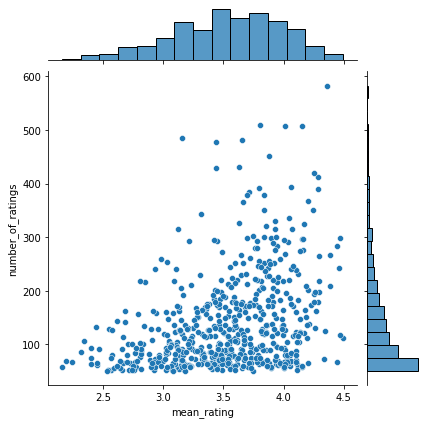

In [ ]:
sns.jointplot(x='mean_rating', y='number_of_ratings', data=agg_ratings_GT100)

In [ ]:
df_GT100 = pd.merge(df, agg_ratings_GT100[['movie_title']], on='movie_title', how='inner')
df_GT100.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83619 entries, 0 to 83618
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             83619 non-null  int64  
 1   movie_id            83619 non-null  int64  
 2   rating              83619 non-null  int64  
 3   timestamp           83619 non-null  int64  
 4   movie_title         83619 non-null  object 
 5   release_date        83619 non-null  object 
 6   video_release_date  0 non-null      float64
 7   IMDb_URL            83619 non-null  object 
 8   unknown             83619 non-null  int64  
 9   Action              83619 non-null  int64  
 10  Adventure           83619 non-null  int64  
 11  Animation           83619 non-null  int64  
 12  Children's          83619 non-null  int64  
 13  Comedy              83619 non-null  int64  
 14  Crime               83619 non-null  int64  
 15  Documentary         83619 non-null  int64  
 16  Dram

In [ ]:
print('The ratings dataset has', df_GT100['user_id'].nunique(), 'unique users') # Number of users
print('The ratings dataset has', df_GT100['movie_id'].nunique(), 'unique movies') # Number of movies
print('The ratings dataset has', df_GT100['rating'].nunique(), 'unique ratings') # Number of ratings
print('The unique ratings are', sorted(df_GT100['rating'].unique())) # List of unique ratings


The ratings dataset has 943 unique users
The ratings dataset has 604 unique movies
The ratings dataset has 5 unique ratings
The unique ratings are [1, 2, 3, 4, 5]


In [ ]:
matrix = df_GT100.pivot_table(index='movie_title', columns='user_id', values='rating')
matrix.head()

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
movie_title,,,,,,,,,,,,,,,,,,,,,
101 Dalmatians (1996),2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,2.0,4.0,NaN,NaN,NaN,NaN,NaN
12 Angry Men (1957),5.0,NaN,NaN,NaN,NaN,4.0,4.0,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2 Days in the Valley (1996),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0
"20,000 Leagues Under the Sea (1954)",3.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001: A Space Odyssey (1968),4.0,NaN,NaN,NaN,4.0,5.0,5.0,NaN,NaN,5.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN


In [ ]:
matrix_norm = matrix.subtract(matrix.mean(axis=1), axis = 0)
matrix_norm.head()
# this is basically like (x-xbar)

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
movie_title,,,,,,,,,,,,,,,,,,,,,
101 Dalmatians (1996),-0.908257,NaN,NaN,NaN,-0.908257,NaN,NaN,NaN,NaN,NaN,...,-0.908257,NaN,NaN,-0.908257,1.091743,NaN,NaN,NaN,NaN,NaN
12 Angry Men (1957),0.656000,NaN,NaN,NaN,NaN,-0.344000,-0.344000,NaN,NaN,0.656000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2 Days in the Valley (1996),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.774194,NaN,NaN,NaN,NaN,NaN,NaN,-1.225806
"20,000 Leagues Under the Sea (1954)",-0.500000,NaN,NaN,NaN,NaN,NaN,1.500000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001: A Space Odyssey (1968),0.030888,NaN,NaN,NaN,0.030888,1.030888,1.030888,NaN,NaN,1.030888,...,0.030888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.969112,NaN


In [ ]:
item_similarity = matrix_norm.T.corr()
item_similarity.head()

movie_title,101 Dalmatians (1996),12 Angry Men (1957),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),"39 Steps, The (1935)",Absolute Power (1997),"Abyss, The (1989)",Ace Ventura: Pet Detective (1994),Addams Family Values (1993),...,William Shakespeare's Romeo and Juliet (1996),Willy Wonka and the Chocolate Factory (1971),Wings of Desire (1987),"Wings of the Dove, The (1997)",Winnie the Pooh and the Blustery Day (1968),"Wizard of Oz, The (1939)",Wolf (1994),"Wrong Trousers, The (1993)",Young Frankenstein (1974),Young Guns (1988)
movie_title,,,,,,,,,,,,,,,,,,,,,
101 Dalmatians (1996),1.000000,-0.049890,0.048973,0.266928,-0.043407,0.111111,0.398783,0.236350,-0.147491,1.950581e-01,...,0.257404,1.052613e-01,0.575224,0.880705,-0.101371,0.366592,0.219445,-0.002382,0.158840,0.119234
12 Angry Men (1957),-0.049890,1.000000,0.256625,0.274772,0.178848,0.457176,-0.163455,0.045374,-0.243775,-7.285383e-19,...,0.265786,1.491640e-01,0.098473,-0.167860,0.284898,0.165508,0.297699,0.330186,0.096546,0.068944
2 Days in the Valley (1996),0.048973,0.256625,1.000000,0.240966,0.332724,0.000000,-0.038838,0.174608,0.235904,-3.804293e-02,...,0.573097,1.043466e-01,0.698501,0.012098,0.512989,0.159602,0.043253,-0.126357,0.064559,0.156220
"20,000 Leagues Under the Sea (1954)",0.266928,0.274772,0.240966,1.000000,0.259308,-0.038127,0.162583,0.426051,-0.061919,3.866801e-02,...,0.461401,-3.175489e-17,0.546594,0.193649,-0.108756,0.452486,0.422577,0.548083,-0.096465,-0.010894
2001: A Space Odyssey (1968),-0.043407,0.178848,0.332724,0.259308,1.000000,0.367256,-0.241580,0.089206,0.138417,-1.602364e-01,...,0.128939,1.472927e-01,0.021423,-0.255616,0.196614,0.236830,-0.018560,0.186458,-0.001307,-0.174918


In [ ]:
def itemsimilarity(picked_userid,picked_movie):
  picked_userid_watched = pd.DataFrame(matrix_norm[picked_userid].dropna(axis=0, how='all').sort_values(ascending=False)).reset_index().rename(columns={picked_userid:'rating'})
  picked_movie_similarity_score = item_similarity[[picked_movie]].reset_index().rename(columns={picked_movie:'similarity_score'})
  picked_userid_watched_similarity = pd.merge(left=picked_userid_watched, right=picked_movie_similarity_score, on='movie_title', how='inner').sort_values('similarity_score', ascending=False)[:10]
  return picked_userid_watched_similarity



```
Hybrid Recommendation
```



In [239]:
n_recommendations = 10

In [242]:
my_favorite_movies = input("enter the movie name")

favmovid = movie_titles[movie_titles['title'] == my_favorite_movies]
famovid = favmovid.iloc[0,0]
print(famovid)

print("------------------------Search based on item's content similarity---------------------------------------")
print('The movies similar to' , my_favorite_movies , ':' )
iics = itemsimilarity(famovid,my_favorite_movies)
for i in range(1,10):
  print(f'\t{i}.{iics.iloc[i,0]}')

print('\n')
print("--------------Search based on similarity between user's preference--------------------------------------")
print('The users like' , my_favorite_movies , 'also like:')
cfs = predict_movies(my_favorite_movies)
a = cfs.index
for i in range(1,11):
  print(f"\t{i}.{a[i]}")

enter the movie name101 Dalmatians (1996)
225
------------------------Search based on item's content similarity---------------------------------------
The movies similar to 101 Dalmatians (1996) :
	1.Cinderella (1950)
	2.Some Like It Hot (1959)
	3.Right Stuff, The (1983)
	4.Braveheart (1995)
	5.Vertigo (1958)
	6.English Patient, The (1996)
	7.Devil's Own, The (1997)
	8.Sound of Music, The (1965)
	9.Field of Dreams (1989)


--------------Search based on similarity between user's preference--------------------------------------
The users like 101 Dalmatians (1996) also like:
	1.Murder at 1600 (1997)
	2.Miracle on 34th Street (1994)
	3.Being There (1979)
	4.Remains of the Day, The (1993)
	5.Gone with the Wind (1939)
	6.Piano, The (1993)
	7.Under Siege (1992)
	8.Top Gun (1986)
	9.Arsenic and Old Lace (1944)
	10.Patton (1970)
